# Import statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
%matplotlib inline

# Reading csv

In [3]:
df=pd.read_csv("IRIS.csv")
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
10,5.4,3.7,1.5,0.2,Iris-setosa
117,7.7,3.8,6.7,2.2,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
54,6.5,2.8,4.6,1.5,Iris-versicolor
50,7.0,3.2,4.7,1.4,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica


In [4]:
type_flower=df['species'].unique()
type_flower

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.shape

(150, 5)

In [6]:
sp_col=df['species']

# Feature engg.

In [7]:
# Handling categorical values 

target=[]
rows=df.shape[0]
for i in range(rows):
    index=np.where(type_flower==df.iloc[i][4])[0][0]
    target.append(index)


C:\Users\User\AppData\Local\Temp\ipykernel_5788\199959796.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  index=np.where(type_flower==df.iloc[i][4])[0][0]


In [8]:
target_new=pd.Series(target)
target_new


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64

In [9]:
df2=df.drop(['species'],axis=1)


In [10]:

new_df=pd.concat([df2,target_new],axis=1)

In [11]:
new_df.head()

,sepal_length,sepal_width,petal_length,petal_width,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
rename_list={0:'species'}
new_df.rename(columns=rename_list,inplace=True)
new_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# train test split

In [13]:
x=new_df.drop(['species'],axis=1)
y=new_df['species']
new_df.shape

(150, 5)

# Train and Test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


# Model Training

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.score(x_test,y_test)

1.0

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sb

In [19]:
y_pre=knn.predict(x_test)
cnm=confusion_matrix(y_test,y_pre)

<Axes: >

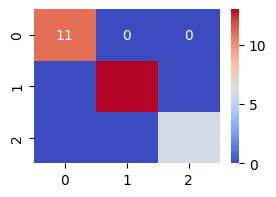

In [21]:
plt.figure(figsize=(3,2))
sb.heatmap(cnm,annot=True,cmap='coolwarm')

# Model report

In [29]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

